<a href="https://colab.research.google.com/github/pranavkantgaur/ML-course/blob/main/ml_lec_2_feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model evaluation
* Confusion matrix: 
* Accuracy
* Precision
* Recall
* ROC (Receiver Operating Characteristics) curve: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc




## Model validation

* K-Fold Cross-Validation: Resampling without replacement
* Leave-One-Out Cross-Validation (LOOCV)
* Random Subsampling
* Bootstrapping: Resampling with replacement

### Further reading
https://dzone.com/articles/machine-learning-validation-techniques



## Perfomance of model depends on data quality

## Preparing the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
width = np.array([140, 150, 160, 190])
height = np.array([55, 60, 71, 99])

mean_width = width.mean()
std_width = width.std()

mean_height = height.mean()
std_height = height.std()

max_height = height.max()
min_height = height.min()

max_width = width.max()
min_width = width.min()



In [ ]:
max_min_norm_height = [(x-min_height)/(max_height-min_height) for x in height]
max_min_norm_width = [(x-min_width)/(max_width-min_width) for x in width]

std_norm_height = [(x-mean_height)/std_height for x in height]
std_norm_width = [(x-mean_width)/std_width for x in width]

In [ ]:
print(max_min_norm_height)
print(max_min_norm_width)


[0.0, 0.11363636363636363, 0.36363636363636365, 1.0]
[0.0, 0.2, 0.4, 1.0]


In [ ]:
print(std_norm_height)
print(std_norm_width)

[-0.9539245257678995, -0.6604092870700843, -0.014675761934890763, 1.6290095747728746]
[-1.0690449676496976, -0.5345224838248488, 0.0, 1.6035674514745462]


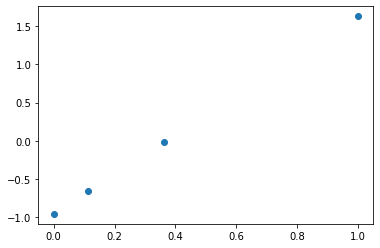

In [ ]:
plt.scatter(max_min_norm_height,std_norm_height)

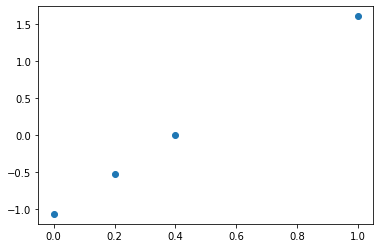

In [ ]:
plt.scatter(max_min_norm_width,std_norm_width)

(array([70., 70., 70., 70., 70., 70., 70., 70., 70., 70.]),
 array([-1.72957821, -1.38366257, -1.03774693, -0.69183129, -0.34591564,
         0.        ,  0.34591564,  0.69183129,  1.03774693,  1.38366257,
         1.72957821]),
 <a list of 10 Patch objects>)

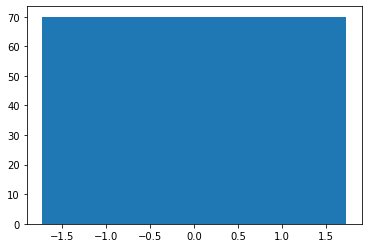

In [ ]:
random_data = np.linspace(1,1000,700)
std_norm_random_data = [(x-random_data.mean())/random_data.std() for x in random_data]
plt.hist(std_norm_random_data)

(array([  9.,  26.,  63.,  94., 166., 161., 104.,  54.,  19.,   4.]),
 array([-2.88433582, -2.29629817, -1.70826051, -1.12022285, -0.53218519,
         0.05585247,  0.64389013,  1.23192779,  1.81996544,  2.4080031 ,
         2.99604076]),
 <a list of 10 Patch objects>)

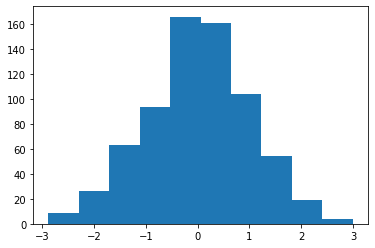

In [ ]:
random_data = np.random.normal(size = 700)
std_norm_random_data = [(x-random_data.mean())/random_data.std() for x in random_data]
plt.hist(std_norm_random_data)

In [ ]:
'''
After scaling > 1
1. Truncate to 0 - 1
2. Outlier for noisy data
3. Debug case: Model retraining?, analmoly?
'''

## Remove redundacy